In [50]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load and check data

In [51]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## EDA and preprocessing

In [52]:
crime.shape

(50, 5)

In [53]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [54]:
crime_columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']

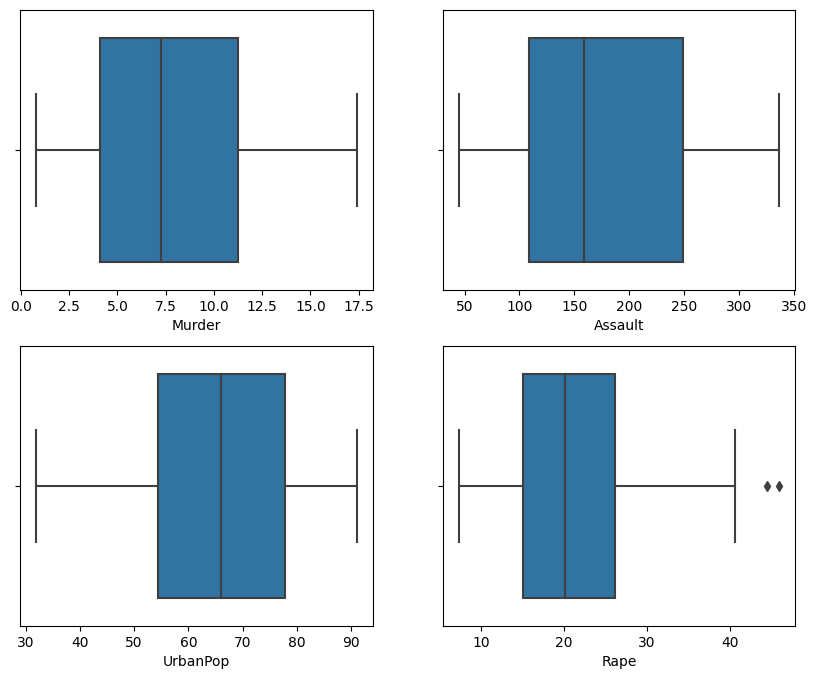

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
for i in range(len(crime_columns)):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=crime,x = crime_columns[i])

In [56]:
print(f"Outlier Index of Rape column : {crime[crime['Rape']>42].index}")
crime.drop(crime[crime['Rape']>42].index, axis=0, inplace=True)

Outlier Index of Rape column : Int64Index([1, 27], dtype='int64')


In [57]:
array = crime.iloc[:,1:].values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
       [  2.1,  57. ,  56. ,   9.5],
 

In [58]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array)

## DBSCAN

In [59]:
dbscan = DBSCAN(eps=1, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=6)

In [60]:
dbscan_pred = dbscan.labels_
dbscan_pred

array([-1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,
        0, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
       -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

### DBSCAN : 2 clusters

## Hierarchical

In [61]:
from sklearn.cluster import KMeans

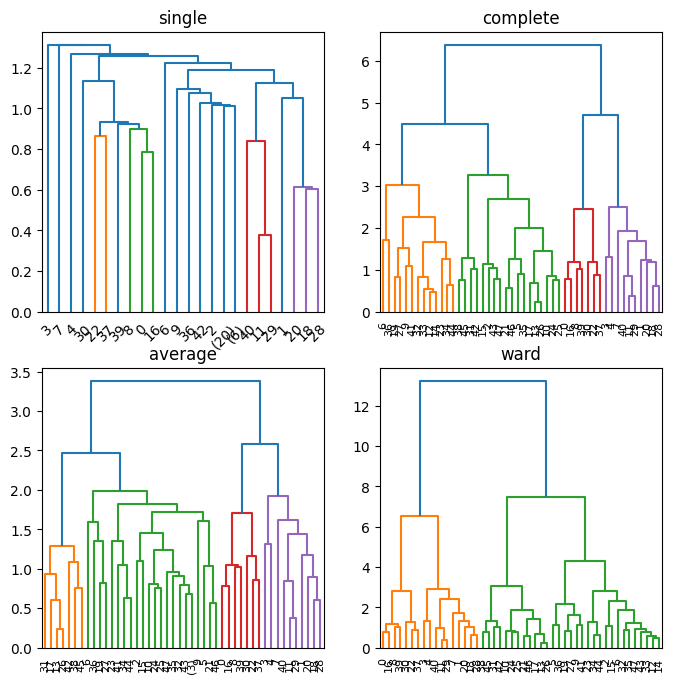

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.cluster.hierarchy as sch
method = ['single', 'complete','average','ward']
plt.figure(figsize=(8,8))
for i in range(len(method)):
    plt.subplot(2,2,i+1)
    dendrogram = sch.dendrogram(sch.linkage(X,method=method[i]),truncate_mode = 'level',p=10)
    plt.title(method[i])

In [63]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,linkage='ward')

In [64]:
hc_pred = hc.fit_predict(X)
hc_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

### Hier : 2 clusters

## K-means

In [65]:
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

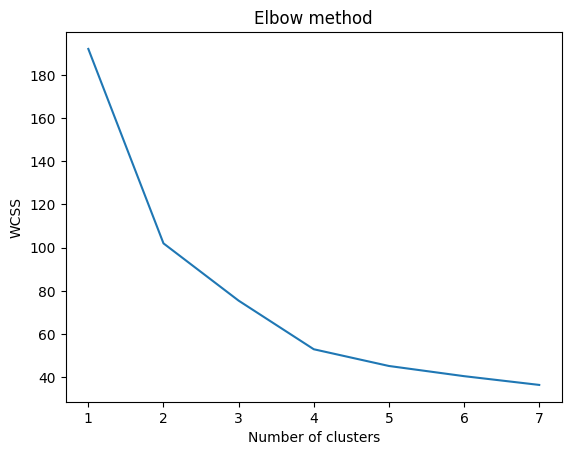

In [66]:
plt.plot(range(1,8),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [67]:
wcss

[192.0,
 102.00020911955329,
 75.48856000326715,
 52.988746851306026,
 45.24604034883646,
 40.53139940157253,
 36.47867786956795]

In [68]:
kmeans = KMeans(n_clusters=2, random_state=0)
predict_kmeans = kmeans.fit_predict(X)
predict_kmeans

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

### K-means : 2 clusters

In [70]:
crime['hierarchical'] = hc_pred
crime['Kmeans'] = predict_kmeans
crime['DBSCAN'] = dbscan_pred
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hierarchical,Kmeans,DBSCAN
0,Alabama,13.2,236,58,21.2,1,1,-1
2,Arizona,8.1,294,80,31.0,1,1,-1
3,Arkansas,8.8,190,50,19.5,0,0,-1
4,California,9.0,276,91,40.6,1,1,-1
5,Colorado,7.9,204,78,38.7,1,1,-1


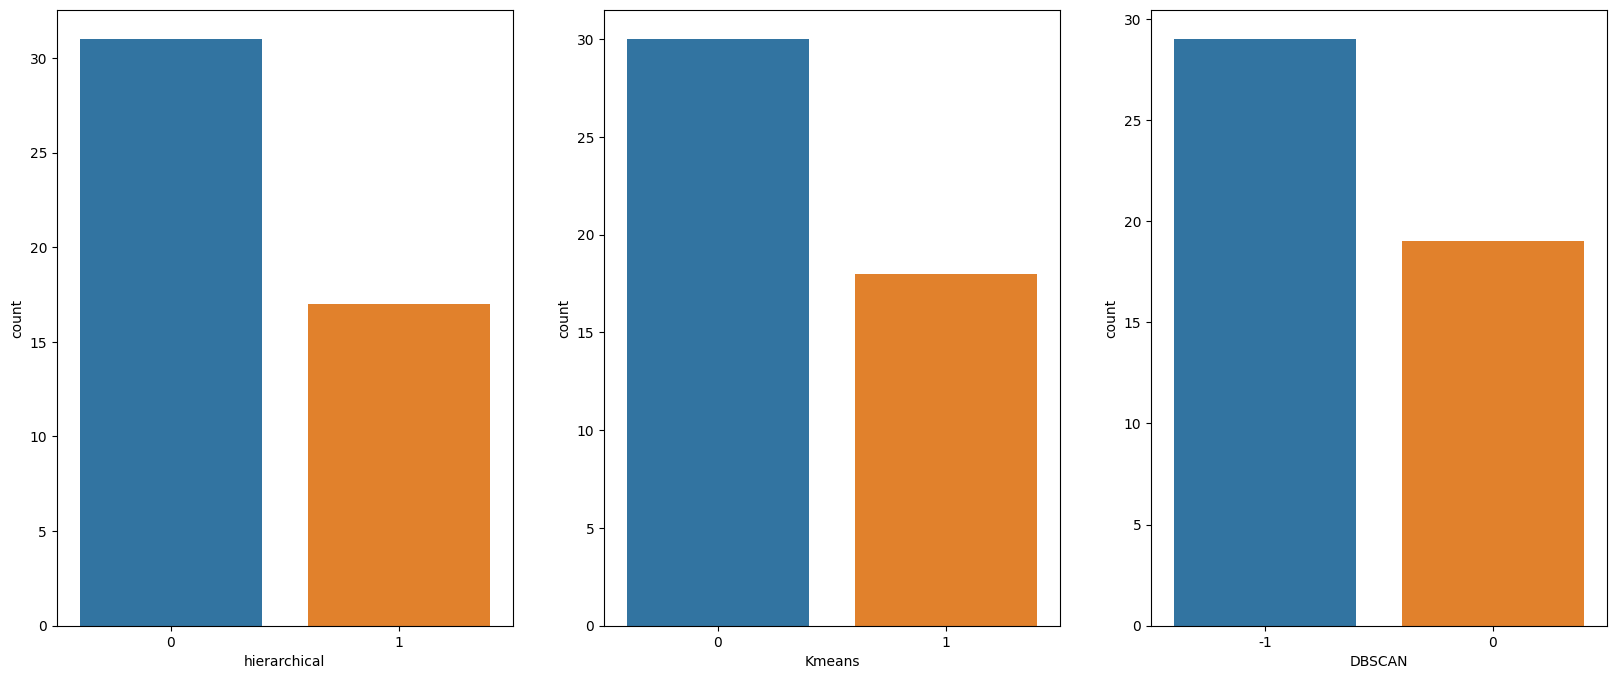

In [71]:
plt.figure(figsize=(20,8))
result = ['hierarchical','Kmeans','DBSCAN']
for i in range(len(result)):
    plt.subplot(1,3,i+1)
    sns.countplot(data=crime, x = result[i])

So we can see from the above graph that using all these three clustering method their are 3 clusters.